# Logistic Regression on SUV dataset
Read dataset suv_data.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

suv_data=pd.read_csv('suv_data.csv')
print(suv_data.head(10))

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0


# Data Understanding
Use Visualization techniques and descriptive statistics

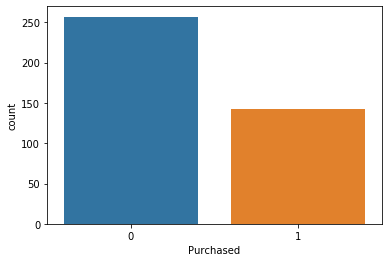

In [3]:
sns.countplot('Purchased',data=suv_data)

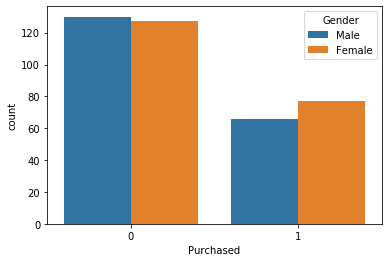

In [4]:
sns.countplot('Purchased',hue='Gender',data=suv_data)

In [5]:
suv_data.loc[:,['Age','EstimatedSalary','Purchased']]

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


(array([28., 37., 46., 35., 77., 65., 35., 31., 18., 28.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <a list of 10 Patch objects>)

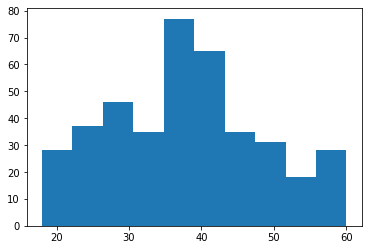

In [6]:
plt.hist(suv_data['Age'])

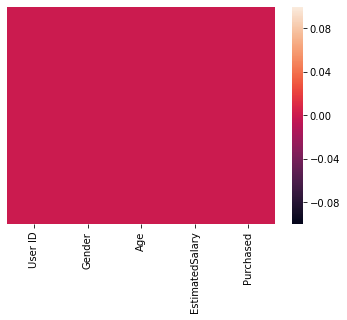

In [7]:
sns.heatmap(suv_data.isnull(),yticklabels=False)

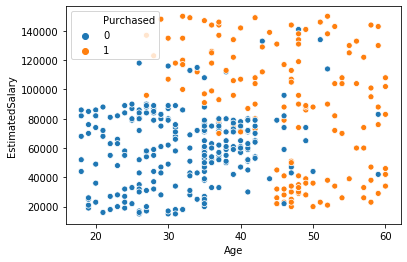

In [8]:
sns.scatterplot(suv_data['Age'],suv_data['EstimatedSalary'],hue=suv_data['Purchased'])

# Data Preperation
Cleanse Data (deal with missing data,inconsistent data,inavalid data, etc)

In [9]:
Gender=pd.get_dummies(suv_data['Gender'],drop_first=True)
print(Gender)

     Male
0       1
1       1
2       0
3       0
4       1
..    ...
395     0
396     1
397     0
398     1
399     0

[400 rows x 1 columns]


In [10]:
suv_data=pd.concat([suv_data,Gender],axis=1)
print(suv_data)

      User ID  Gender  Age  EstimatedSalary  Purchased  Male
0    15624510    Male   19            19000          0     1
1    15810944    Male   35            20000          0     1
2    15668575  Female   26            43000          0     0
3    15603246  Female   27            57000          0     0
4    15804002    Male   19            76000          0     1
..        ...     ...  ...              ...        ...   ...
395  15691863  Female   46            41000          1     0
396  15706071    Male   51            23000          1     1
397  15654296  Female   50            20000          1     0
398  15755018    Male   36            33000          0     1
399  15594041  Female   49            36000          1     0

[400 rows x 6 columns]


In [11]:
suv_data.drop('Gender',axis=1,inplace=True)

In [12]:
print(suv_data)

      User ID  Age  EstimatedSalary  Purchased  Male
0    15624510   19            19000          0     1
1    15810944   35            20000          0     1
2    15668575   26            43000          0     0
3    15603246   27            57000          0     0
4    15804002   19            76000          0     1
..        ...  ...              ...        ...   ...
395  15691863   46            41000          1     0
396  15706071   51            23000          1     1
397  15654296   50            20000          1     0
398  15755018   36            33000          0     1
399  15594041   49            36000          1     0

[400 rows x 5 columns]


In [13]:
suv_data.drop('User ID',axis=1,inplace=True)
print(suv_data)

     Age  EstimatedSalary  Purchased  Male
0     19            19000          0     1
1     35            20000          0     1
2     26            43000          0     0
3     27            57000          0     0
4     19            76000          0     1
..   ...              ...        ...   ...
395   46            41000          1     0
396   51            23000          1     1
397   50            20000          1     0
398   36            33000          0     1
399   49            36000          1     0

[400 rows x 4 columns]


# Build & Evaluate Model
Here, Logistic regression model has built

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=suv_data.loc[:,['Age','EstimatedSalary']]
Y=suv_data['Purchased']
train_X,test_x,train_Y,test_y=train_test_split(X,Y,test_size=0.3,random_state=1)
logmodel=LogisticRegression(solver='liblinear')
logmodel.fit(train_X,train_Y)
prediction=logmodel.predict(test_x)
accuracy=accuracy_score(prediction,test_y)
print('Accuracy:{}'.format(accuracy))

Accuracy:0.5833333333333334


To improve accuracy let's use a standard scaler, which removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X=suv_data.loc[:,['Age','EstimatedSalary']]
Y=suv_data['Purchased']

train_X,test_x,train_Y,test_y=train_test_split(X,Y,test_size=0.25,random_state=0)

sc=StandardScaler()
train_X=sc.fit_transform(train_X)
test_x=sc.transform(test_x)

logmodel=LogisticRegression(random_state=0,solver='liblinear')
logmodel.fit(train_X,train_Y)
prediction=logmodel.predict(test_x)
accuracy=accuracy_score(prediction,test_y)
print('Accuracy:{}'.format(accuracy))

Accuracy:0.89
